In [20]:
import sys
from pathlib import Path


sys.path.append(str(Path('../../../code/myModels').resolve()))

from clarans import MyCLARANS

In [21]:
import pandas as pd
import numpy as np
import os

merged_dir = "../../../data/merged"
train_file_path = os.path.join(merged_dir, "train_data.parquet")
train_data = pd.read_parquet(train_file_path)

features = [c for c in train_data.columns if c not in ['fire','longitude', 'latitude']]
X = train_data[features].to_numpy() 
y = train_data['fire'].to_numpy()

In [22]:
k = 4

clarans = MyCLARANS(
    n_clusters=k,
    num_local=5,
    max_neighbor=100,
    metric='euclidean',
    random_state=42,
    verbose=True
)

clarans.fit(X)

print(f"Best cost (k={k}): {clarans.best_cost_:.4f}")
print(f"Silhouette (k={k}): {clarans.silhouette(X):.4f}")


[Local 1] Initial cost = 236803.3478
  ↓ Improved cost = 210410.4826
  ↓ Improved cost = 209833.0300
  ↓ Improved cost = 202514.4645
  ↓ Improved cost = 202168.5174
  ↓ Improved cost = 201895.1340
  ↓ Improved cost = 201648.0807
  ↓ Improved cost = 200057.5335
  ↓ Improved cost = 188611.1962
  ↓ Improved cost = 187635.0504
  ↓ Improved cost = 182540.0427
  ↓ Improved cost = 182327.4288
  ↓ Improved cost = 181766.4645
  ↓ Improved cost = 181235.7594
[Local 2] Initial cost = 246087.1554
  ↓ Improved cost = 244550.4923
  ↓ Improved cost = 242934.4806
  ↓ Improved cost = 242653.3040
  ↓ Improved cost = 206481.8972
  ↓ Improved cost = 204856.2742
  ↓ Improved cost = 203414.3339
  ↓ Improved cost = 201750.0178
  ↓ Improved cost = 190394.1017
  ↓ Improved cost = 187898.9156
  ↓ Improved cost = 186002.4276
  ↓ Improved cost = 185529.0544
  ↓ Improved cost = 183016.4859
  ↓ Improved cost = 181191.7168
  ↓ Improved cost = 180611.4303
[Local 3] Initial cost = 263085.7444
  ↓ Improved cost = 21090

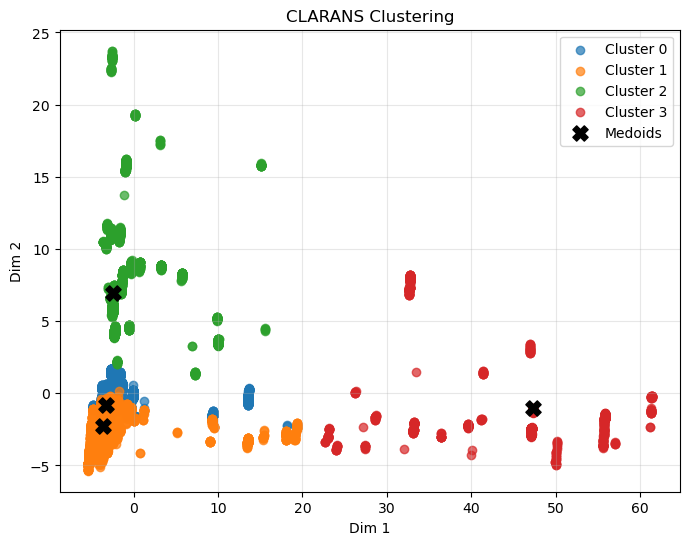

In [23]:
clarans.plot_clusters(X, reducer='pca')

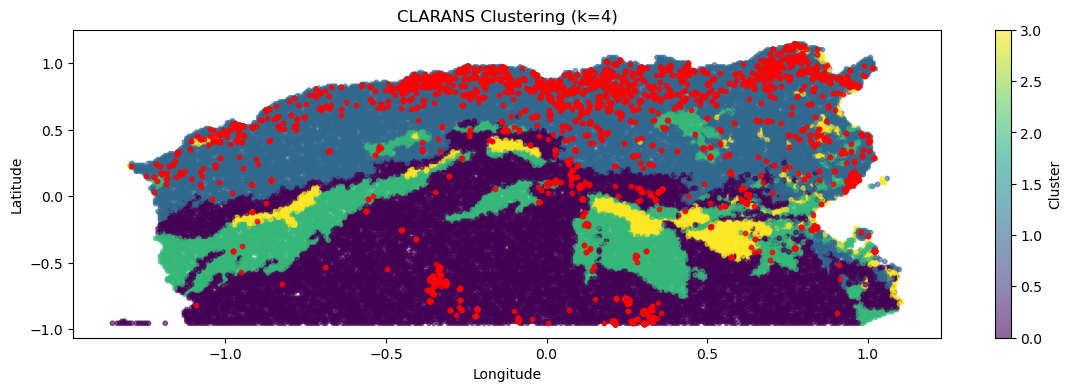

In [24]:

import matplotlib.pyplot as plt
data_plot = train_data.copy()
data_plot['cluster'] = clarans.labels_
plt.figure(figsize=(14,4))
scatter = plt.scatter(
    data_plot['longitude'], 
    data_plot['latitude'], 
    c=data_plot['cluster'], 
    cmap='viridis', 
    alpha=0.6,
    s=10
)
# add fire points in red
fire_points = data_plot[data_plot['fire'] == 1]
plt.scatter(
    fire_points['longitude'], 
    fire_points['latitude'], 
    c='red', 
    label='Fire', 
    alpha=0.8,
    s=10
)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'CLARANS Clustering (k={k})')
# save figure
plt.savefig(os.path.join("../../../images/CLARANS", f"clarans_clusters_k_{k}.png"))
plt.show()


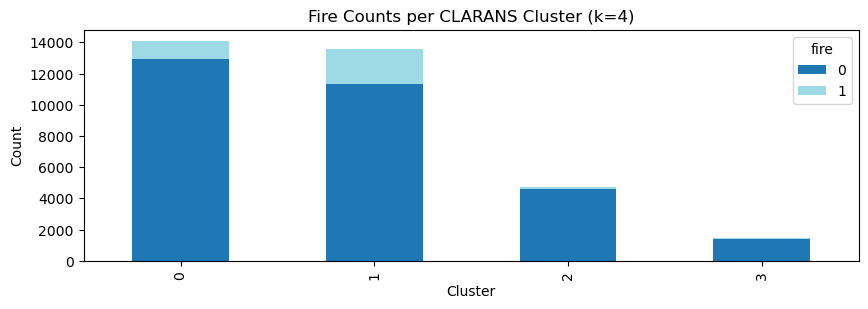

In [25]:
# plot fire counts per cluster
fire_counts = data_plot.groupby('cluster')['fire'].value_counts().unstack(fill_value=0)
fire_counts.plot(kind='bar', stacked=True, figsize=(10,3), colormap='tab20')
plt.title(f"Fire Counts per CLARANS Cluster (k={k})")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.savefig(os.path.join("../../../images/CLARANS", f"fire_counts_per_cluster_k_{k}.png"))
plt.show()

In [26]:
k = 5

clarans = MyCLARANS(
    n_clusters=k,
    num_local=5,
    max_neighbor=100,
    metric='euclidean',
    random_state=42,
    verbose=True
)

clarans.fit(X)

print(f"cost (k={k}): {clarans.best_cost_:.4f}")
print(f"Silhouette (k={k}): {clarans.silhouette(X):.4f}")

[Local 1] Initial cost = 222484.0947
  ↓ Improved cost = 182399.2237
  ↓ Improved cost = 179801.1841
  ↓ Improved cost = 175618.6034
  ↓ Improved cost = 173708.7721
  ↓ Improved cost = 173497.7124
  ↓ Improved cost = 169278.7165
  ↓ Improved cost = 168922.7038
  ↓ Improved cost = 168405.6909
  ↓ Improved cost = 166357.8174
[Local 2] Initial cost = 245325.4177
  ↓ Improved cost = 210571.5700
  ↓ Improved cost = 205009.7019
  ↓ Improved cost = 199088.3190
  ↓ Improved cost = 187403.9844
  ↓ Improved cost = 187215.2318
  ↓ Improved cost = 184008.0845
  ↓ Improved cost = 176107.3152
  ↓ Improved cost = 164613.9180
  ↓ Improved cost = 164044.5144
  ↓ Improved cost = 161092.3096
  ↓ Improved cost = 157940.1411
[Local 3] Initial cost = 238353.0026
  ↓ Improved cost = 234156.8055
  ↓ Improved cost = 232140.7867
  ↓ Improved cost = 229941.1932
  ↓ Improved cost = 217075.1772
  ↓ Improved cost = 216923.2319
  ↓ Improved cost = 203528.5764
  ↓ Improved cost = 195399.0300
  ↓ Improved cost = 16731

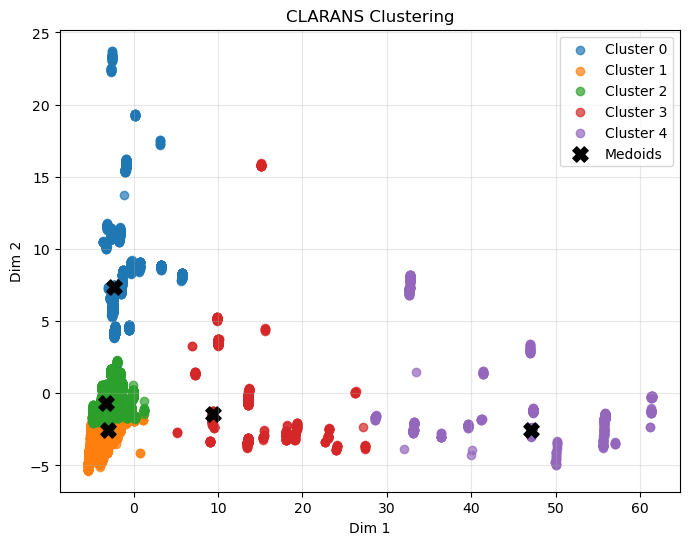

In [27]:
clarans.plot_clusters(X, reducer='pca')

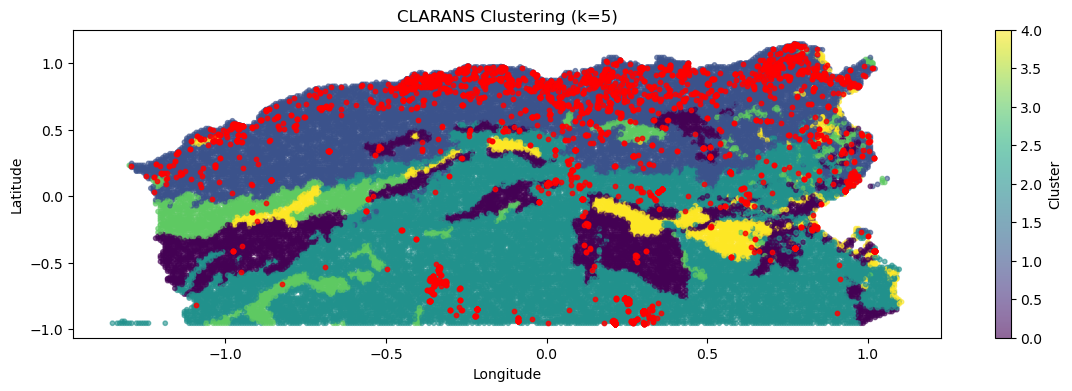

In [28]:
data_plot = train_data.copy()
data_plot['cluster'] = clarans.labels_
plt.figure(figsize=(14,4))
scatter = plt.scatter(
    data_plot['longitude'], 
    data_plot['latitude'], 
    c=data_plot['cluster'], 
    cmap='viridis', 
    alpha=0.6,
    s=10
)
# add fire points in red
fire_points = data_plot[data_plot['fire'] == 1]
plt.scatter(
    fire_points['longitude'], 
    fire_points['latitude'], 
    c='red', 
    label='Fire', 
    alpha=0.8,
    s=10
)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'CLARANS Clustering (k={k})')
# save figure
plt.savefig(os.path.join("../../../images/CLARANS", f"clarans_clusters_k_{k}.png"))
plt.show()


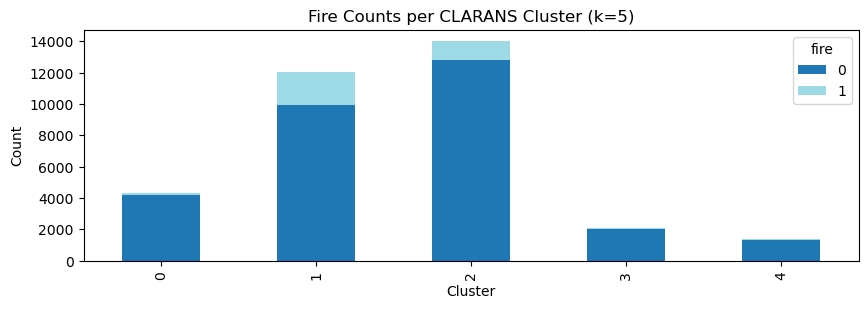

In [13]:
# plot fire counts per cluster
fire_counts = data_plot.groupby('cluster')['fire'].value_counts().unstack(fill_value=0)
fire_counts.plot(kind='bar', stacked=True, figsize=(10,3), colormap='tab20')
plt.title(f"Fire Counts per CLARANS Cluster (k={k})")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.savefig(os.path.join("../../../images/CLARANS", f"fire_counts_per_cluster_k_{k}.png"))
plt.show()